## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_dataset = pd.merge(study_results, mouse_metadata, how = "left", on = "Mouse ID")

# Display the data table for preview
combined_dataset.head(5)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.


number_mice = len(combined_dataset["Mouse ID"].unique())
number_mice

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

mice_duplicates = combined_dataset[combined_dataset.duplicated(subset = ["Mouse ID", "Timepoint"])]
mice_duplicates.head(5)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.000000,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 


mice_duplicates = combined_dataset.loc[combined_dataset["Mouse ID"] == "g989"]
mice_duplicates

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_data = combined_dataset.loc[combined_dataset["Mouse ID"] != "g989"]
cleaned_data.head(5)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
len(cleaned_data["Mouse ID"].unique())

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

mean = cleaned_data.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
median = cleaned_data.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
variance = cleaned_data.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
std_dev = cleaned_data.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
std_error = cleaned_data.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]

# Create df
summary_table = pd.DataFrame({
    "Mean Tumor Volume": mean,
    "Median Tumor Volume": median,
    "Tumor Volume Variance": variance,
    "Tumor Volume Std. Dev.": std_dev,
    "Tumor Volume Std. Error": std_error
})

#Preview df
summary_table


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

summary_table = cleaned_data.groupby("Drug Regimen").agg({"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]})
summary_table

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

unique_drugs = len(cleaned_data["Drug Regimen"].unique())

# drop duplicate mice
dropped_duplicate_mice = cleaned_data.drop_duplicates(subset="Mouse ID", keep="first")

#mice count per drug
mice_count = dropped_duplicate_mice["Drug Regimen"].value_counts()

dropped_duplicate_mice.head(5)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


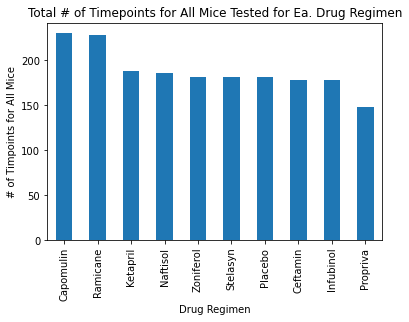

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

counts = cleaned_data["Drug Regimen"].value_counts()
counts.plot(kind = "bar")

plt.ylabel("# of Timpoints for All Mice")
plt.xlabel("Drug Regimen")
plt.title("Total # of Timepoints for All Mice Tested for Ea. Drug Regimen")
plt.show()

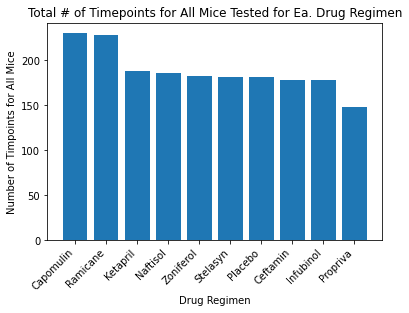

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

plt.bar(counts.index.values, counts.values)
plt.ylabel("Number of Timpoints for All Mice")
plt.xlabel("Drug Regimen")
plt.title("Total # of Timepoints for All Mice Tested for Ea. Drug Regimen")
plt.xticks(rotation = 45, ha = "right")
plt.show()

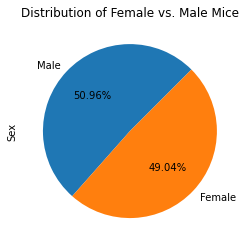

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

counts = cleaned_data["Sex"].value_counts()
counts.plot(kind = "pie", autopct = "%1.2f%%", startangle = 45)

plt.title("Distribution of Female vs. Male Mice")
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = cleaned_data.groupby("Mouse ID")["Timepoint"].max()
last_timepoint = last_timepoint.reset_index()
last_timepoint.head()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
cleaned_merge_df = last_timepoint.merge(cleaned_data, on = ["Mouse ID", "Timepoint"], how = "left")
cleaned_merge_df.head(5)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
cleaned_merge_df["Drug Regimen"].unique()
drug_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_list = []
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in drug_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_count = cleaned_merge_df.loc[cleaned_merge_df["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
    
    # add subset 
    tumor_list.append(final_tumor_count)
    
    # Determine outliers using upper and lower bounds
    quartiles = final_tumor_count.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles [0.75]
    iqr = upperq - lowerq
    lowerbound = lowerq - (1.5 * iqr)
    upperbound = lowerq + (1.5 * iqr)
    outliers = final_tumor_count.loc[(final_tumor_count < lowerbound) | (final_tumor_count > upperbound)]
    
    print(f"Potential outliers for {drug}: {outliers}.")

Potential outliers for Capomulin: 80     47.685963
162    46.539206
Name: Tumor Volume (mm3), dtype: float64.
Potential outliers for Ramicane: 157    45.220869
Name: Tumor Volume (mm3), dtype: float64.
Potential outliers for Infubinol: 27    72.226731
31    36.321346
Name: Tumor Volume (mm3), dtype: float64.
Potential outliers for Ceftamin: Series([], Name: Tumor Volume (mm3), dtype: float64).


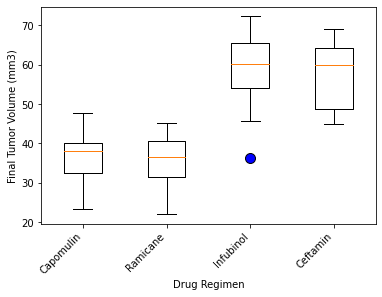

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
final_boxplot = dict(markerfacecolor = "blue", markersize = 10)

plt.boxplot(tumor_list, labels = drug_list, flierprops = final_boxplot)
plt.xlabel("Drug Regimen")
plt.ylabel("Final Tumor Volume (mm3)")
plt.xticks(rotation = 45, ha = "right")
plt.show()

## Line and Scatter Plots

Text(0.5, 1.0, 'Tumor Volume of Mouse s185 Over Time')

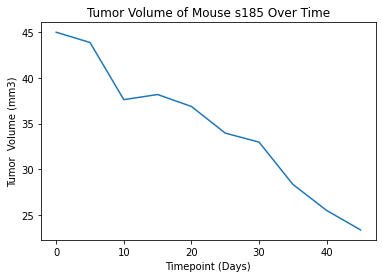

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

capomulin_table = cleaned_data.loc[cleaned_data["Drug Regimen"]=="Capomulin"]
capomulin_table.head()

mouse_info = capomulin_table.loc[capomulin_table["Mouse ID"] == "s185"]
plt.plot(mouse_info["Timepoint"], mouse_info["Tumor Volume (mm3)"])
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor  Volume (mm3)")
plt.title ("Tumor Volume of Mouse s185 Over Time")


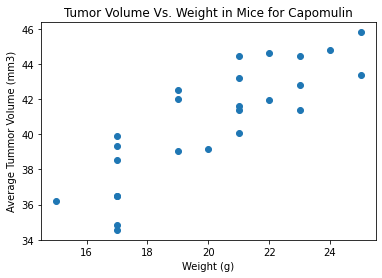

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

capomulin_average = capomulin_table.groupby("Mouse ID").mean()
capomulin_average.head()

plt.scatter(capomulin_average["Weight (g)"], capomulin_average["Tumor Volume (mm3)"])
plt.xlabel("Weight (g)")
plt.ylabel("Average Tummor Volume (mm3)")
plt.title("Tumor Volume Vs. Weight in Mice for Capomulin")
plt.show()

## Correlation and Regression

The correlation between mouse weight and average tumor volume is 0.84.
LinregressResult(slope=0.9544396890241045, intercept=21.552160532685015, rvalue=0.8419363424694718, pvalue=1.3225722434712642e-07, stderr=0.1275435903320134, intercept_stderr=2.590987686768349)


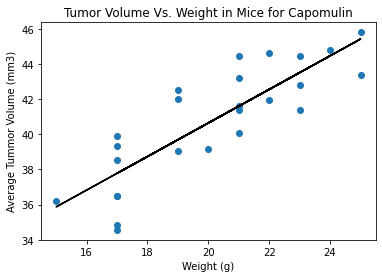

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

correlation = round(st.pearsonr(capomulin_average["Weight (g)"], capomulin_average["Tumor Volume (mm3)"])[0],2)
print(f"The correlation between mouse weight and average tumor volume is {correlation}.")

model = st.linregress(capomulin_average["Weight (g)"], capomulin_average["Tumor Volume (mm3)"])
print(model)

y_values = capomulin_average["Weight (g)"] * model[0] + model[1]

plt.scatter(capomulin_average["Weight (g)"], capomulin_average["Tumor Volume (mm3)"])
plt.plot(capomulin_average["Weight (g)"], y_values, color = "black")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tummor Volume (mm3)")
plt.title("Tumor Volume Vs. Weight in Mice for Capomulin")
plt.show()